In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n_rep = 100
n_bins = 1000
n_nodes = 10
n_regions = 40
n_reads = 10000
PATH = '../../workflows/bp_detection_performance/results/'

In [3]:
gt_files = [PATH + str(n_nodes)+'nodes_'+str(n_regions)+'regions_'+str(n_reads) \
             +'reads_simdata_'+str(x)+'_effective_regions.txt' for x in range(0,n_rep)]
bps_files = [PATH + 'simdata_'+str(x)+'_all_bps_comparison.csv' for x in range(0,n_rep)]
all_bins = range(0,n_bins)

In [4]:
all_tpr = []
all_fpr = []
for gt_file, bps_file in zip(gt_files, bps_files):
    bps = pd.read_csv(bps_file, header=None)
    bps.columns = ['idx','log_sp','stdev']
    ground_truth = pd.read_csv(gt_file,header=None)
    ground_truth = ground_truth[0].values.tolist()
    # import ipdb; ipdb.set_trace()
    
    threshold_coeffs = np.linspace(0.1,2.1,1000)
    # Each breakpoint candidate has a different stdev value.
    # The ROC computations takes that into account.tpr_values = []
    tpr_values = []
    fpr_values = []
    for thr in threshold_coeffs:
        # import ipdb; ipdb.set_trace()
        positives = bps[(thr*(bps['log_sp']) - bps['stdev'] > 0)]['idx'].values.tolist()
        # negatives = bps[(thr*(bps['log_sp']) - bps['stdev'] <= 0)]['idx'].values.tolist()
        negatives = [i for i in all_bins if i not in positives] # use all bins but the positive ones
        # this allows you to compare the results across multiple datasets

        true_positives = [i for i in positives if i in ground_truth]
        false_positives = [i for i in positives if i not in true_positives]

        true_negatives = [i for i in negatives if i not in ground_truth]
        false_negatives = [i for i in negatives if i in ground_truth]

        tpr = len(true_positives) / (len(true_positives) + len(false_negatives))
        fpr = len(false_positives) / (len(false_positives) + len(true_negatives))
        tpr_values.append(tpr)
        fpr_values.append(fpr)
    
    all_tpr.append(tpr_values)
    all_fpr.append(fpr_values)

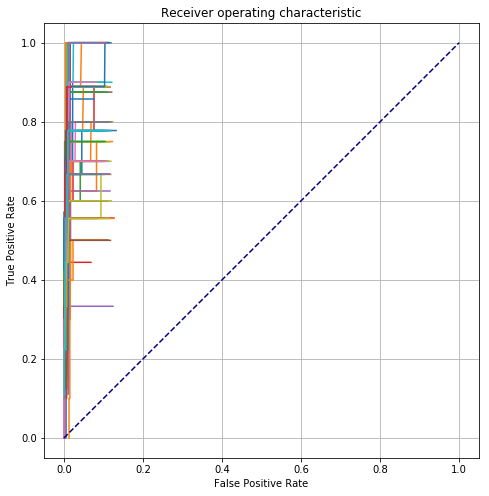

In [5]:
# roc_auc = auc(fpr_values, tpr_values)
plt.figure(figsize=(8,8))
for tpr_values, fpr_values in zip(all_tpr, all_fpr):
    plt.plot(fpr_values, tpr_values) # label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
plt.show()